# Tarefa:
> Gerando uma figura que apresenta prismas desenvolvidos por uma determinada modelagem e a curva de anomalia gravitacional produzida por todos os prismas utilizados no modelo. <br>

In [1]:
# Importando bibliotecas do python
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
# path referente aa localizacao da pasta modules:
#sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
sys.path.append('C:/Users/bruno/Documents/UFF/Projeto_Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Importando bibliotecas extras
import prism

In [4]:
# Gerando os pontos de observacoes

nobs = 100   # numero de observacoes

# Definindo os limites em x do levantamento sintetico em metros
xmin = 0.1     # limite minimo em x do levantamento sintetico
xmax = 1000.0  # limite maximo em x do levantamento sintetico

# Gerando as coordenadas dos pontos de observacoes
xo = np.linspace(xmin, xmax, nobs) # coordenadas em x
yo = xo*0.0                        # coordenadas em y
zo = np.zeros(nobs)                # coordenadas em z

# Caso 1

>## Anomalia gravimétrica gerada por apenas um único prisma qualquer estabelecido dentro dos limites em x do levantamento sintético

In [5]:
# Definindo o prisma

# model[0] e model[1] sao os limites do prisma no eixo x
# model[2] e model[3] sao os limites do prisma no eixo y
# model[4] e model[5] sao os limites do prisma no eixo z
# model[6] é a densidade do prisma
model = [520, 550, \
         -500, 500, \
         50, 150, \
         2.67]           

In [6]:
# Calculando os componentes gravitacionais

gx1 = prism.prism_gx(xo, yo, zo, model, model[6])
gy1 = prism.prism_gy(xo, yo, zo, model, model[6])
gz1 = prism.prism_gz(xo, yo, zo, model, model[6])

Extensão de um prisma no eixo x: 30 m
Extensão de um prisma no eixo z: 100 m


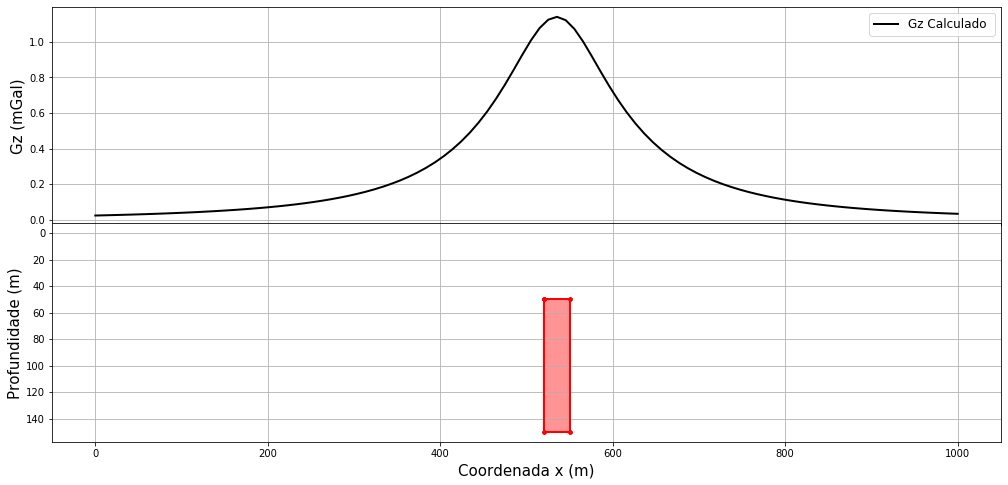

In [7]:
# Printando as extensoes verticais e horizontais dos prismas
ext_x = model[1] - model[0]
ext_z = model[5] - model[4]
print('Extensão de um prisma no eixo x:', format(ext_x,'.0f'), 'm')
print('Extensão de um prisma no eixo z:', format(ext_z,'.0f'), 'm')

# Plotting
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

ax1.plot(xo, gz1, 'k-', label='Gz Calculado ', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.label_outer()

for i in range (5):
    ax2.plot([model[0], model[1], model[1], model[0], model[0]], \
             [model[4], model[4], model[5], model[5], model[4]], \
             ".-r", linewidth=2)

    ax2.fill_between([model[0], model[1], model[1], model[0], model[0]], \
                     [model[4], model[4], model[5], model[5], model[4]], \
                     facecolor='red', alpha=0.1)

ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_xlabel('Coordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.grid()
plt.show( )

# Caso 2

>## Levantamento gravimétrico gerado por prismas específicados dentro de um conjunto de prismas criados dentro dos limites em x do levantamento sintético

In [8]:
# Gerando um conjunto de prismas justapostos que ocupem toda a extensao em x do levantamento sintetico

# Definindo os limites verticais dos prismas
zmin = -0.1    # limite minimo em z dos prismas
zmax = 3000.0  # limite maximo em z dos prismas

# Gerandos as coordenadas que definem os 4 vertices de cada prima

xmed = ( xo[0] + xo[1] ) / 2.0
x_prisma = abs( xo[0] - ( xmed ) ) # distância do centro dos prismas até um dos seus limites horizontais

x_coord = [] # coordenadas horizontais de cada vértice de cada prisma
z_coord = [] # coordenadas verticais de cada vértice de cada prisma
# x_coord [i] e z_coord [i] correspondem às coordenadas do prisma cujo índice é i
for i in range (nobs):
    x_coord.append([xo[i] - x_prisma, xo[i] + x_prisma, xo[i] + x_prisma, \
                    xo[i] - x_prisma, xo[i] - x_prisma])
    
    z_coord.append([zmin, zmin, zmax, zmax, zmin])

In [9]:
# Selecionando os prismas considerados no levantamento sintético pelos seus indices
index_total = [5, 20, 21, 34, 35, 36, 53, 54, 55, 56, 72, 73, 74, 75, 76, \
                  91, 92, 93, 94, 95, 96]

# Conferindo se a selecao de prismas foi feita corretamente
if max(index_total) >= nobs:
        raise ValueError("Retirar os indices incorretos da lista index_total")
        
# Calculando os componentes gravitacionais
                         
gx2 = 0
gy2 = 0
gz2 = 0
for i in index_total:
    
    decisao = 'nao' # variavel que da liberdade para variar determinados dados
    # model[0] e model[1] sao os limites do prisma no eixo x
    # model[2] e model[3] sao os limites do prisma no eixo y
    # model[4] e model[5] sao os limites do prisma no eixo z
    # model[6] é a densidade do prisma
    if decisao == 'nao':
        model = [x_coord[i][0], x_coord[i][1], \
                 -500, 500, \
                 z_coord[i][0], z_coord[i][2], \
                 2.67]
    else:
        density = []  
        model = [x_coord[i][0], x_coord[i][1], \
                 -500, 500, \
                 z_coord[i][0], z_coord[i][2], \
                 density[i]]              
    
    gx2 += prism.prism_gx(xo, yo, zo, model, model[6])
    gy2 += prism.prism_gy(xo, yo, zo, model, model[6])
    gz2 += prism.prism_gz(xo, yo, zo, model, model[6])

Extensão de um prisma no eixo x: 10 m
Extensão de um prisma no eixo z: 3000 m


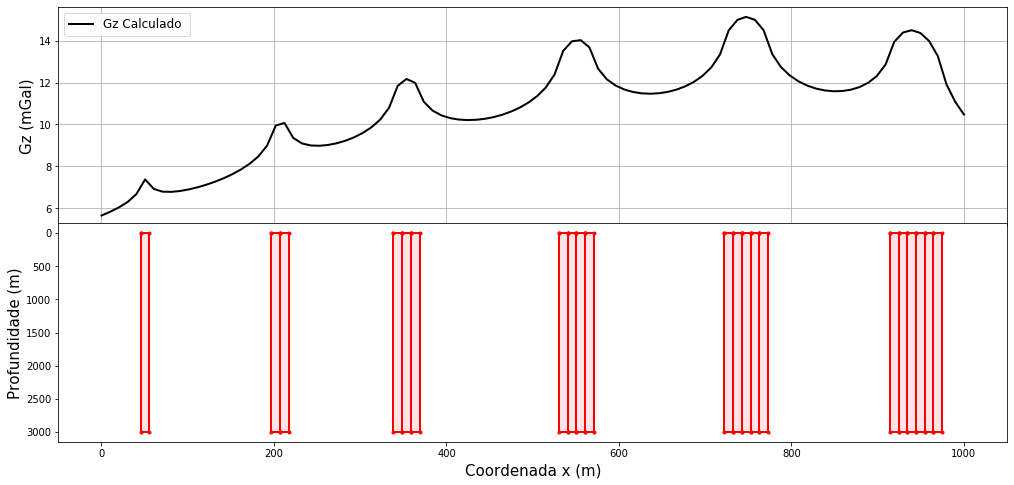

In [10]:
# Printando as extensoes verticais e horizontais dos prismas
ext_x = model[1] - model[0]
ext_z = model[5] - model[4]
print('Extensão de um prisma no eixo x:', format(ext_x,'.0f'), 'm')
print('Extensão de um prisma no eixo z:', format(ext_z,'.0f'), 'm')

# Plotting
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

ax1.plot(xo, gz2, 'k-', label='Gz Calculado ', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.label_outer()

for i in index_total:
    ax2.plot(x_coord[i], z_coord[i], ".-r", linewidth=2)

    ax2.fill_between(x_coord[i], z_coord[i], facecolor='red', alpha=0.1)

ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_xlabel('Coordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
#plt.savefig('figs/Figura.png', format='png') # Salvando a figura em uma imagem PNG
plt.show( )

# Desenvolvendo uma função para a modelagem de prismas apresentada acima 

In [11]:
import modeling

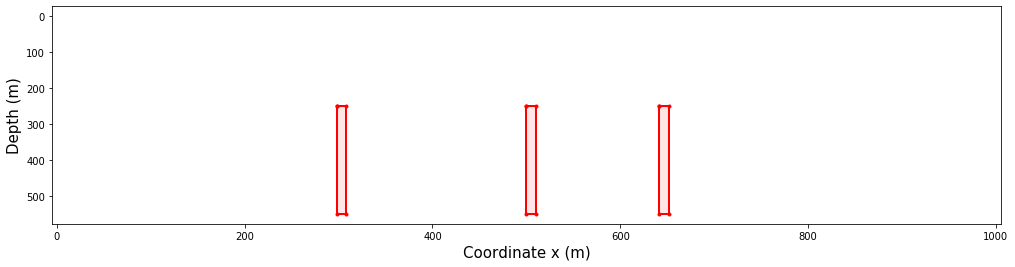

In [12]:
modeling.multi_prism([30, 50, 64], 100, 0.0, 1000.0, 250.0, 550.0)

# Comparando o resultado da função 'prism3D_gz' com o resultado da rotina desenvolvida aqui

In [18]:
# Gerando os pontos de observacoes

nobs_c = 100   # numero de observacoes

# Definindo os limites em x do levantamento sintetico em metros
xmin_c = 0.0     # limite minimo em x do levantamento sintetico
xmax_c = 1000.0  # limite maximo em x do levantamento sintetico

# Gerando as coordenadas dos pontos de observacoes
xo_c = np.linspace(xmin_c, xmax_c, nobs_c) # coordenadas em x
yo_c = xo*0.0                             # coordenadas em y
zo_c = np.zeros(nobs_c)                   # coordenadas em z

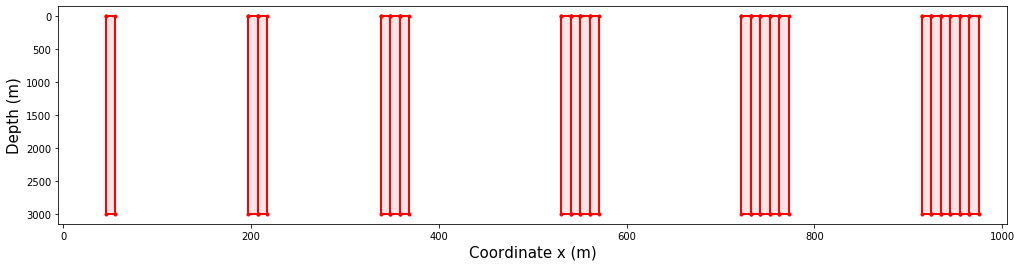

In [20]:
# Definindo prismas atráves da função 'multi_prism', que serão as fontes das anomalias gravimétricas 

# Definindo os limites verticais dos prismas
zmin_c = -0.1    # limite minimo em z dos prismas
zmax_c = 3000.0  # limite maximo em z dos prismas

# Definindo os primas que serão utilizados
index_total_c = [5, 20, 21, 34, 35, 36, 53, 54, 55, 56, 72, 73, 74, 75, 76, \
                  91, 92, 93, 94, 95, 96]

# Gerando prismas
modeling.multi_prism(index_total_c, nobs_c, xmin_c, xmax_c, zmin_c, zmax_c)

In [15]:
# Resultado gerado pela rotina desenvolvida por aqui
gz2

array([ 5.65220019,  5.83348039,  6.04255255,  6.29989982,  6.67593028,
        7.37731103,  6.92046804,  6.79003677,  6.78045518,  6.82251313,
        6.89708027,  6.99669097,  7.1184203 ,  7.26182235,  7.42837211,
        7.62168724,  7.84863709,  8.12238874,  8.47184844,  8.98736651,
        9.94554136, 10.06903261,  9.35849763,  9.09262651,  8.99628103,
        8.98077587,  9.01920735,  9.10095428,  9.22258468,  9.38545372,
        9.59592179,  9.86829956, 10.23491703, 10.79392992, 11.84126801,
       12.16886941, 11.98288206, 11.07712752, 10.65960613, 10.43425777,
       10.3026739 , 10.2320642 , 10.20730509, 10.22060429, 10.26802828,
       10.34813175, 10.46146858, 10.61063733, 10.80087215, 11.04155475,
       11.34991708, 11.76180458, 12.38053392, 13.51118811, 13.966149  ,
       14.02182551, 13.67846412, 12.6601563 , 12.15504372, 11.85860777,
       11.66815883, 11.54856982, 11.4834579 , 11.46447894, 11.4877132 ,
       11.55229673, 11.66007842, 11.81604027, 12.02976073, 12.31

In [48]:
# Resultado pela função 'prism3D_gz'

# Definindo variaveis da funcao
x_c = xo
y_c = yo
z_c = zo
density_c = np.array([2.67])
deltax_c = 2.0 * x_prisma
deltay_c = 1000.0
top_c = -0.1 * np.ones(len(index_total))
bottom_c = 3000.0 * np.ones(len(index_total))
xprism_c = []
for i in index_total:
    xprism_c.append([xo[i]])
xprism_c = np.array(xprism_c)
yprism_c = np.zeros(len(index_total))
yprism_c = yprism_c.reshape(21,1)

# Rodando a funcao
res_f = prism.prism3D_gz(x_c, y_c, z_c, xprism_c, yprism_c, top_c, bottom_c, deltax_c, deltay_c, density_c)

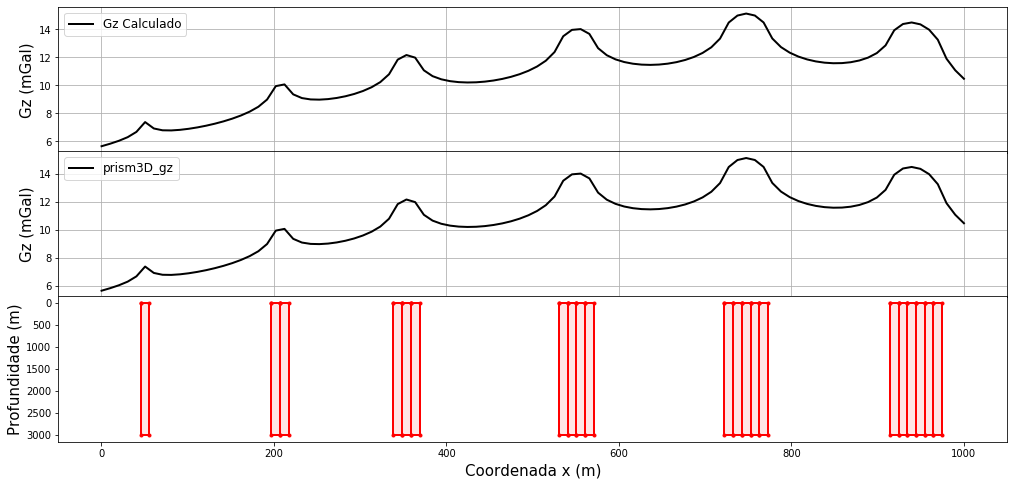

In [49]:
# Comparacao de resultados
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

ax1.plot(xo, gz2, 'k-', label='Gz Calculado', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.label_outer()

ax2.plot(xo, gz2, 'k-', label='prism3D_gz', linewidth=2)
ax2.legend(fontsize=12)
ax2.set_ylabel('Gz (mGal)', fontsize=15)
ax2.grid()
ax2.label_outer()

for i in index_total:
    ax3.plot(x_coord[i], z_coord[i], ".-r", linewidth=2)

    ax3.fill_between(x_coord[i], z_coord[i], facecolor='red', alpha=0.1)

ax3.set_ylabel('Profundidade (m)', fontsize=15)
ax3.set_xlabel('Coordenada x (m)', fontsize=15)
ax3.invert_yaxis()
ax3.label_outer()
#plt.savefig('figs/Figura.png', format='png') # Salvando a figura em uma imagem PNG
plt.show( )